In [50]:
# Importing Modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
import os
import re



In [3]:
# Importing Excel files as Panda Dataframes and setting corret header
salaries = pd.read_excel("/Users/yeet/Downloads/Nba_Salaries.xlsx", header=[1])
raptor = pd.read_csv("/Users/yeet/Downloads/Nba_Raptor.csv")
positions = pd.read_excel("/Users/yeet/Downloads/Nba_Positions.xlsx", header=[1])


In [4]:
# Checking the columns and rows of each dataset
salaries.head()
# Going back and changing the header to the first row to clean


,Player,Tm,2021-22,2022-23,2023-24,2024-25,2025-26,2026-27,Signed Using,Guaranteed
0,Stephen Curry\curryst01,GSW,45780966.0,48070014.0,51915615.0,55761216.0,59606817.0,NaN,Bird Rights,261134628.0
1,John Wall\walljo01,HOU,44310840.0,47366760.0,NaN,NaN,NaN,NaN,Bird Rights,44310840.0
2,Russell Westbrook\westbru01,LAL,44211146.0,47063478.0,NaN,NaN,NaN,NaN,Bird Rights,44211146.0
3,James Harden\hardeja01,PHI,43848000.0,46872000.0,NaN,NaN,NaN,NaN,Bird Rights,43848000.0
4,LeBron James\jamesle01,LAL,41180544.0,44474988.0,NaN,NaN,NaN,NaN,Bird,85655532.0


In [5]:
raptor.head()
# Indexing looks good for this dataset need to see all columns
pd.set_option("display.max_columns", None)
raptor.head()


,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Precious Achiuwa,achiupr01,2022,3756,1869,-2.455986,1.901913,-0.554073,-1.779239,3.206397,1.427158,-2.482188,2.277229,-0.204959,2.406589,2.307854,0.098735,-2.380509,2.207647,-0.172862,-0.733311
1,Steven Adams,adamsst01,2022,4213,2030,0.386445,1.128752,1.515197,6.082560,-3.267251,2.815309,1.570692,0.242498,1.813189,4.712875,5.081437,-0.368562,1.293730,1.478569,2.772299,-0.255461
2,Bam Adebayo,adebaba01,2022,4005,1982,-0.686831,3.833596,3.146765,0.468922,4.278192,4.747114,-0.511016,4.111883,3.600867,6.448614,6.133512,0.315102,-0.150604,3.563875,3.413271,0.352590
3,Santi Aldama,aldamsa01,2022,763,360,-2.653547,-2.168950,-4.822497,-2.753666,1.210282,-1.543383,-2.878840,-1.641453,-4.520294,-0.326319,-0.326319,0.000000,-1.726796,-2.109404,-3.836200,0.358397
4,LaMarcus Aldridge,aldrila01,2022,2205,1050,-0.504400,2.325608,1.821208,1.090268,-0.449419,0.640849,-0.231834,1.901645,1.669811,2.362395,2.362395,0.000000,0.287913,0.923711,1.211624,-0.225615


In [6]:
positions.head()
#Cleaning up the headers and changing them to the first row 

,RANK,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor,"USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor",TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions,FTA,FT%,2PA,2P%,3PA,3P%,"eFG%Effective Shooting PercentageWith eFG%, three-point shots made are worth 50% more than two-point shots made. eFG% Formula=(FGM+ (0.5 x 3PM))/FGA","TS%True Shooting PercentageTrue shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.",PPGPointsPoints per game.,RPGReboundsRebounds per game.,TRB%Total Rebound PercentageTotal rebound percentage is estimated percentage of available rebounds grabbed by the player while the player is on the court.,APGAssistsAssists per game.,AST%Assist PercentageAssist percentage is an estimated percentage of teammate field goals a player assisted while the player is on the court,SPGStealsSteals per game.,BPGBlocksBlocks per game.,TOPGTurnoversTurnovers per game.,"VIVersatility IndexVersatility index is a metric that measures a player’s ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10",ORTGOffensive RatingIndividual offensive rating is the number of points produced by a player per 100 total individual possessions.,DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.
0,NaN,Precious Achiuwa,Tor,F,22.56,73,23.6,49.2,18.5,11.3,131,0.595,447,0.468,156,0.359,0.486,0.503,9.1,6.5,14.9,1.1,6.9,0.51,0.56,1.15,6.8,105.4,104.0
1,NaN,Steven Adams,Mem,C,28.73,76,26.3,54.8,12.0,19.6,199,0.543,383,0.548,1,0.000,0.547,0.560,6.9,10.0,19.9,3.4,16.1,0.87,0.79,1.51,9.4,124.7,103.9
2,NaN,Bam Adebayo,Mia,C-F,24.73,56,32.6,67.9,25.0,14.4,340,0.753,723,0.562,6,0.000,0.557,0.608,19.1,10.1,17.5,3.4,17.5,1.43,0.79,2.64,10.7,117.2,98.2
3,NaN,Santi Aldama,Mem,F-C,21.25,32,11.2,23.4,18.5,9.9,32,0.625,84,0.560,48,0.125,0.424,0.452,4.1,2.7,12.6,0.7,7.7,0.19,0.31,0.50,7.1,101.1,103.9
4,NaN,LaMarcus Aldridge,Bro,C-F,36.73,47,22.3,46.5,22.4,8.0,102,0.873,412,0.578,46,0.304,0.566,0.604,12.9,5.5,13.4,0.9,6.3,0.30,1.00,0.94,7.2,119.6,108.8


In [7]:
#It's time to start cutting down on unnecessary column and row data. For the Denver Nuggets 2023 season we are in desperate need of a defensive minded guard. 
# This includes point guard and shooting Guard. I will start deleting unecessary columns that do not contribute to defensive metrics, defensive positioning, salary ,etc.
positions_1 = positions.drop(positions.columns[[0,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,25,26,27]],axis =1).copy()
#Need to change FULL NAME to "Player" to match all the datasets on 
positions_1.rename(columns={'FULL NAME':'Player'}, inplace=True) 
positions_1.head()
#Checking new copy of dataframe. All unnecessary columns have been removed.

,Player,POS,SPGStealsSteals per game.,BPGBlocksBlocks per game.,DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.
0,Precious Achiuwa,F,0.51,0.56,104.0
1,Steven Adams,C,0.87,0.79,103.9
2,Bam Adebayo,C-F,1.43,0.79,98.2
3,Santi Aldama,F-C,0.19,0.31,103.9
4,LaMarcus Aldridge,C-F,0.30,1.00,108.8


In [8]:
# We are going to remove all columns that don't pertain to the 2023 season, while leaving how they are signed because it could affect availability.
salaries_1 = salaries.drop(salaries.columns[[1, 2, 4, 5, 6, 7, 9]], axis=1).copy()


In [9]:
salaries_1.head()
#We also need to strip all the text after the '\'

,Player,2022-23,Signed Using
0,Stephen Curry\curryst01,48070014.0,Bird Rights
1,John Wall\walljo01,47366760.0,Bird Rights
2,Russell Westbrook\westbru01,47063478.0,Bird Rights
3,James Harden\hardeja01,46872000.0,Bird Rights
4,LeBron James\jamesle01,44474988.0,Bird


In [10]:
#This will clean up the Player column so that all the data can merge with the other dataframes

salaries_1["Player"] = salaries_1["Player"].str.split(r"\\").str.get(0)
salaries_1.head()


,Player,2022-23,Signed Using
0,Stephen Curry,48070014.0,Bird Rights
1,John Wall,47366760.0,Bird Rights
2,Russell Westbrook,47063478.0,Bird Rights
3,James Harden,46872000.0,Bird Rights
4,LeBron James,44474988.0,Bird


In [11]:
raptor.head()

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Precious Achiuwa,achiupr01,2022,3756,1869,-2.455986,1.901913,-0.554073,-1.779239,3.206397,1.427158,-2.482188,2.277229,-0.204959,2.406589,2.307854,0.098735,-2.380509,2.207647,-0.172862,-0.733311
1,Steven Adams,adamsst01,2022,4213,2030,0.386445,1.128752,1.515197,6.082560,-3.267251,2.815309,1.570692,0.242498,1.813189,4.712875,5.081437,-0.368562,1.293730,1.478569,2.772299,-0.255461
2,Bam Adebayo,adebaba01,2022,4005,1982,-0.686831,3.833596,3.146765,0.468922,4.278192,4.747114,-0.511016,4.111883,3.600867,6.448614,6.133512,0.315102,-0.150604,3.563875,3.413271,0.352590
3,Santi Aldama,aldamsa01,2022,763,360,-2.653547,-2.168950,-4.822497,-2.753666,1.210282,-1.543383,-2.878840,-1.641453,-4.520294,-0.326319,-0.326319,0.000000,-1.726796,-2.109404,-3.836200,0.358397
4,LaMarcus Aldridge,aldrila01,2022,2205,1050,-0.504400,2.325608,1.821208,1.090268,-0.449419,0.640849,-0.231834,1.901645,1.669811,2.362395,2.362395,0.000000,0.287913,0.923711,1.211624,-0.225615


In [12]:
#Dropping all the unnecessary columns
raptor_1 = raptor.drop(
    raptor.columns[[1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20]],
    axis=1,
).copy()
# Need to change player_name to "Player" to match all the datasets on
raptor_1.rename(columns={"player_name": "Player"}, inplace=True)


In [13]:
raptor_1.head()
#Now we have all three datasets cleaned a prepared for merging

,Player,mp,raptor_defense
0,Precious Achiuwa,1869,2.277229
1,Steven Adams,2030,0.242498
2,Bam Adebayo,1982,4.111883
3,Santi Aldama,360,-1.641453
4,LaMarcus Aldridge,1050,1.901645


In [14]:
# First we are merging the salries and postitons datasets with an outer join to capture all the relevant columns
first_merge = pd.merge(salaries_1, positions_1, on="Player", how="outer")
first_merge.head(-20)


,Player,2022-23,Signed Using,POS,SPGStealsSteals per game.,BPGBlocksBlocks per game.,DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.
0,Stephen Curry,48070014.0,Bird Rights,G,1.33,0.36,104.9
1,John Wall,47366760.0,Bird Rights,NaN,NaN,NaN,NaN
2,Russell Westbrook,47063478.0,Bird Rights,G,0.95,0.26,107.1
3,James Harden,46872000.0,Bird Rights,G,1.27,0.70,108.2
4,James Harden,46872000.0,Bird Rights,G,1.29,0.24,106.9
...,...,...,...,...,...,...,...
933,Javonte Smart,NaN,NaN,G,0.31,0.15,109.3
934,Javonte Smart,NaN,NaN,G,0.50,0.25,109.9
935,Cassius Stanley,NaN,NaN,G,0.56,0.22,107.4
936,Craig Sword,NaN,NaN,G,1.33,0.00,69.4


In [15]:
# Now we are merging the first merge with the raptor dataset with an outer join to capture all the relevant columns
final_dataset = pd.merge(first_merge, raptor_1, on="Player", how="outer")
# We need to set a filter on minutes played because we will have many outliers that are not relevant to our analysis.
# For example players who played less than significant minutes will have their data skewed(Raptor needs at least 1,000 minutes played for the data to be releveant).
# Also, there are cap space limitations, we cannot have a player making more than 20 million.
final_dataset_1 = final_dataset[final_dataset["POS"].isin(["G"])].copy()
final_dataset_1 = final_dataset_1[final_dataset["mp"] > 1000]
final_dataset_1 = final_dataset_1[final_dataset["2022-23"] < 20000000]

final_dataset_1 = final_dataset_1.drop_duplicates(subset=["Player"], keep="first")
# Renaming Columns to clean up the final dataframe
final_dataset_1.rename(
    columns={
        "2022-23": "Salary",
        "POS": "Position",
        "SPGStealsSteals per game.": "Steals per Game",
        "BPGBlocksBlocks per game.": "Blocks per Game",
        "DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.": "Defensive Rating",
        "mp": "Minutes Played",
        "raptor_defense": "Raptor Defense",},
    inplace=True,
)

final_dataset_1.head()
# (341,9)


/var/folders/r5/qfq2b2t53k1d_llvp62bp1lw0000gn/T/ipykernel_86837/4168446209.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dataset_1 = final_dataset_1[final_dataset["mp"] > 1000]
/var/folders/r5/qfq2b2t53k1d_llvp62bp1lw0000gn/T/ipykernel_86837/4168446209.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dataset_1 = final_dataset_1[final_dataset["2022-23"] < 20000000]


,Player,Salary,Signed Using,Position,Steals per Game,Blocks per Game,Defensive Rating,Minutes Played,Raptor Defense
67,Lonzo Ball,19534884.0,Sign and Trade,G,1.83,0.89,108.3,1212.0,2.883888
70,Eric Gordon,19568360.0,Cap Space,G,0.49,0.32,119.6,1669.0,-2.653253
72,Eric Bledsoe,19375000.0,Bird Rights,G,1.28,0.35,107.0,1361.0,2.003771
77,Caris LeVert,18796296.0,1st Round pick,G,0.90,0.46,113.2,1781.0,-1.828332
81,Spencer Dinwiddie,18000000.0,Sign and Trade,G,0.61,0.16,109.9,2148.0,-0.463782


In [16]:
#Now it is time to reset the index
final_dataset_1.reset_index(drop=True, inplace=True)
final_dataset_1.head()

,Player,Salary,Signed Using,Position,Steals per Game,Blocks per Game,Defensive Rating,Minutes Played,Raptor Defense
0,Lonzo Ball,19534884.0,Sign and Trade,G,1.83,0.89,108.3,1212.0,2.883888
1,Eric Gordon,19568360.0,Cap Space,G,0.49,0.32,119.6,1669.0,-2.653253
2,Eric Bledsoe,19375000.0,Bird Rights,G,1.28,0.35,107.0,1361.0,2.003771
3,Caris LeVert,18796296.0,1st Round pick,G,0.90,0.46,113.2,1781.0,-1.828332
4,Spencer Dinwiddie,18000000.0,Sign and Trade,G,0.61,0.16,109.9,2148.0,-0.463782


<AxesSubplot:xlabel='Raptor Defense', ylabel='Salary'>

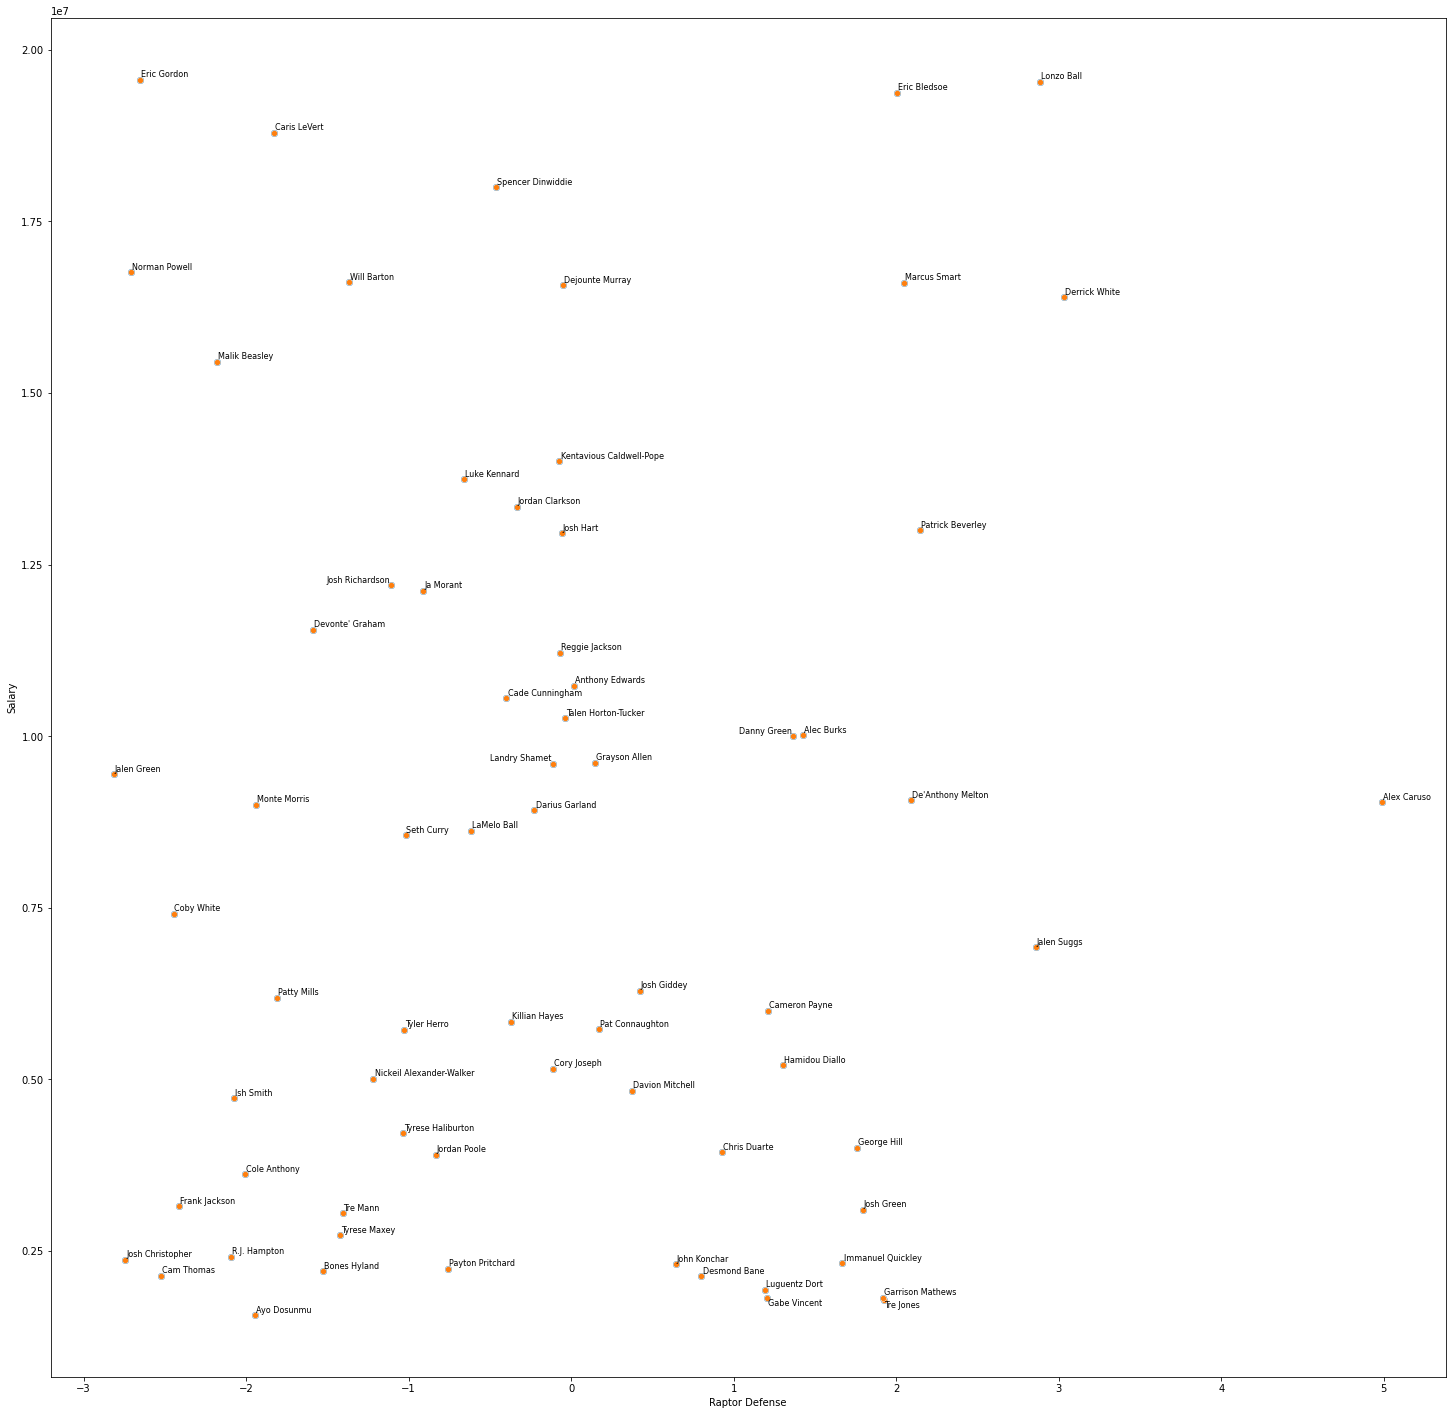

In [18]:
plt.rcParams["figure.figsize"] = (25,25)
fig, ax = plt.subplots()
# plot
ax.scatter(x=final_dataset_1['Raptor Defense'],y=final_dataset_1['Salary'])
# set labels
ax.set_xlabel('Raptor Defense')
ax.set_ylabel('Salary')


#Now we need to annotate the graph with the player names. Also we need to use Adjust Text to make sure the names don't overlap.
texts = []
for i in range(len(final_dataset_1)):
    texts.append(ax.text(final_dataset_1['Raptor Defense'][i], final_dataset_1['Salary'][i], final_dataset_1['Player'][i], size=8))
    
adjust_text(texts)
#Use Seaborn for more creativity
sns.scatterplot(ax=ax, x="Raptor Defense", y="Salary", data=final_dataset_1)

In [40]:
#Now it's time to standardize the data so we can run a cluster analysis
scaler = StandardScaler()
final_dataset_std = final_dataset_1.copy()
final_dataset_std[["Raptor Defense", "Salary"]] = scaler.fit_transform(final_dataset_std[["Raptor Defense", "Salary"]])
final_dataset_std.head()

,Player,Salary,Signed Using,Position,Steals per Game,Blocks per Game,Defensive Rating,Minutes Played,Raptor Defense
0,Lonzo Ball,2.088341,Sign and Trade,G,1.83,0.89,108.3,1212.0,1.809312
1,Eric Gordon,2.094581,Cap Space,G,0.49,0.32,119.6,1669.0,-1.487372
2,Eric Bledsoe,2.058535,Bird Rights,G,1.28,0.35,107.0,1361.0,1.285311
3,Caris LeVert,1.950652,1st Round pick,G,0.90,0.46,113.2,1781.0,-0.996234
4,Spencer Dinwiddie,1.802205,Sign and Trade,G,0.61,0.16,109.9,2148.0,-0.183813


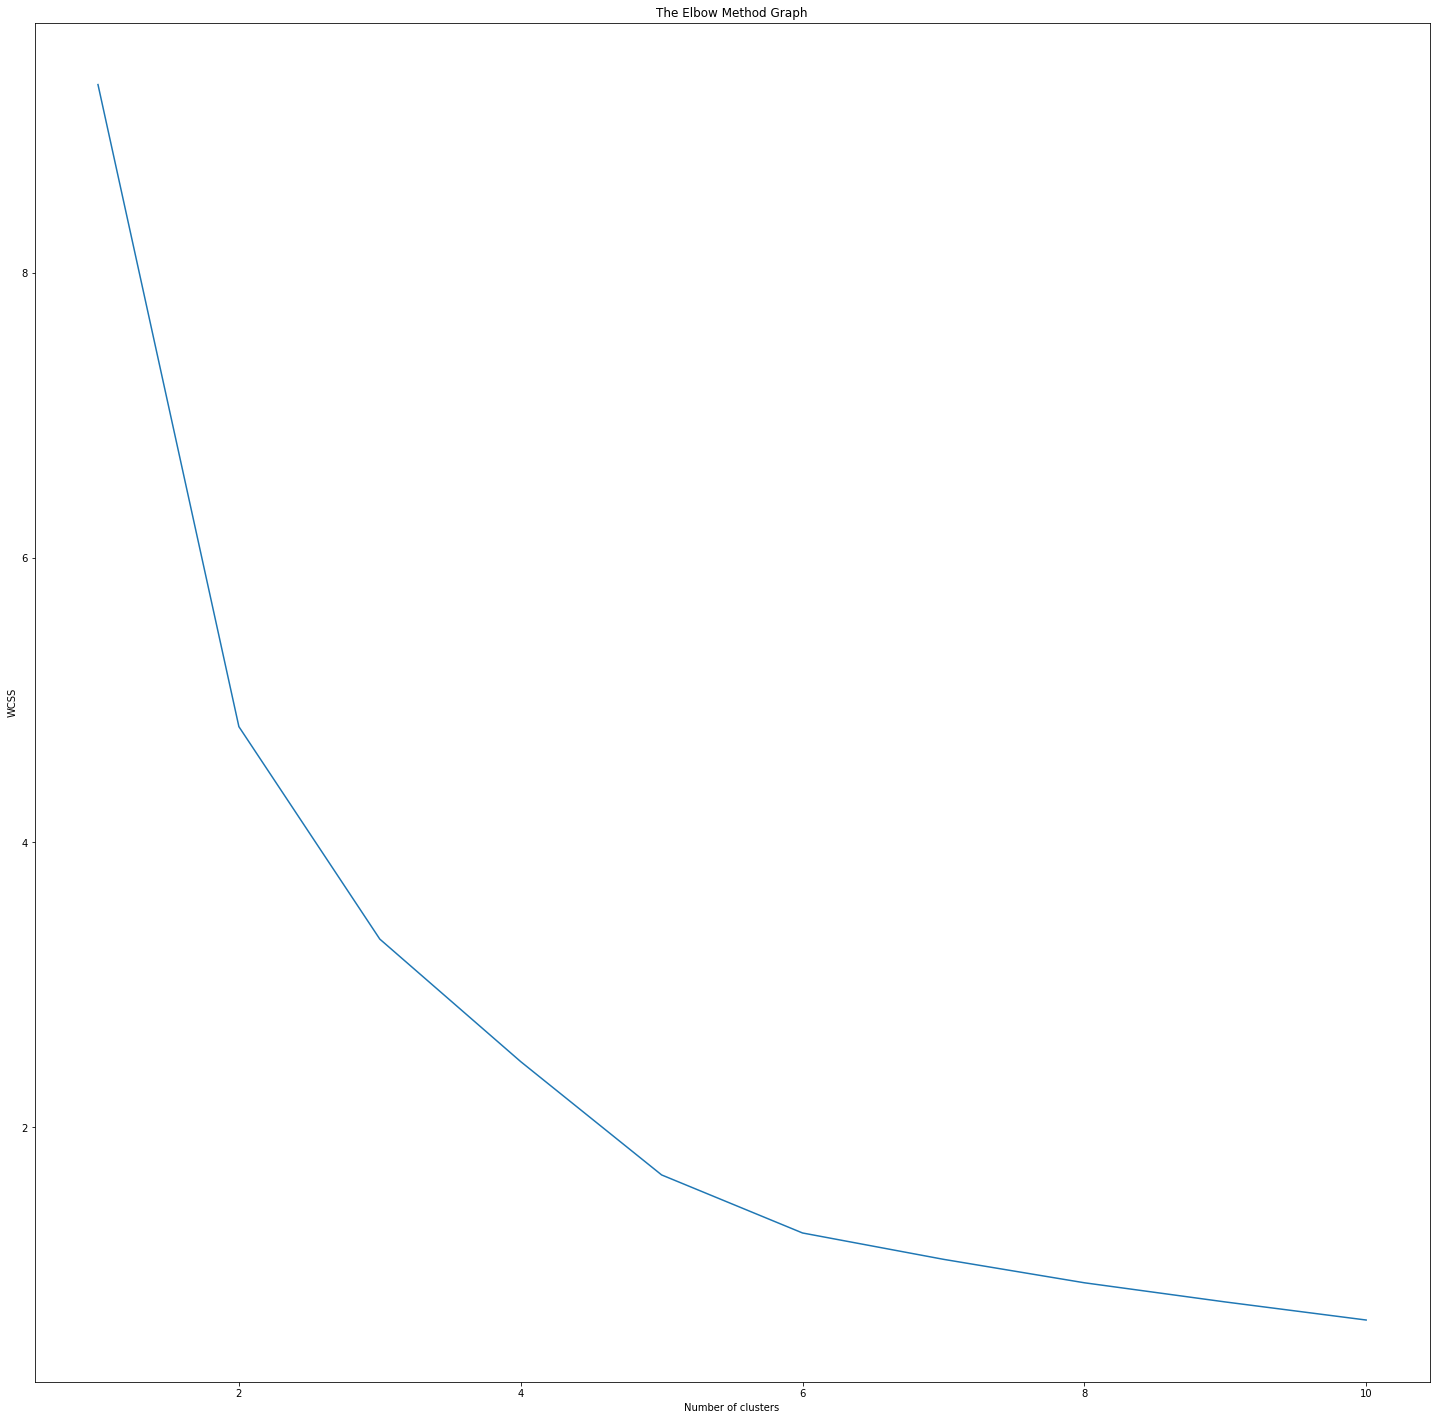

In [21]:
#Time to run an elbow method to see what kind of clusters should be used
wccs = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=1)
    kmeans.fit(final_dataset_std[["Raptor Defense", "Salary"]])
    wccs.append(kmeans.inertia_)

plt.plot(range(1,11),wccs)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
#From the elbow method we can see that we could use anywhere from 4-6 clusters. I am going to choose 6 clusters because it's the optimal number of clusters for this dataset.
#We can separate the data into 6 clusters: Cheap/Bad at Defense,Midrange/Bat at Defense, Expensive/Bad at Defense, Expensive/Good at Defense,Midrange/Good at Defense, Cheap/Good at Defense 
kmeans = KMeans(n_clusters=6, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
kmeans.fit(final_dataset_std[["Raptor Defense", "Salary"]])
predict = kmeans.predict(final_dataset_std[["Raptor Defense", "Salary"]])
#Now we assign the cluster value to the dataframe so that we can plot
final_dataset_std["Cluster"] = predict
final_dataset_std.head()


,Player,Salary,Signed Using,Position,Steals per Game,Blocks per Game,Defensive Rating,Minutes Played,Raptor Defense,Cluster
0,Lonzo Ball,2.088341,Sign and Trade,G,1.83,0.89,108.3,1212.0,1.809312,5
1,Eric Gordon,2.094581,Cap Space,G,0.49,0.32,119.6,1669.0,-1.487372,1
2,Eric Bledsoe,2.058535,Bird Rights,G,1.28,0.35,107.0,1361.0,1.285311,5
3,Caris LeVert,1.950652,1st Round pick,G,0.90,0.46,113.2,1781.0,-0.996234,1
4,Spencer Dinwiddie,1.802205,Sign and Trade,G,0.61,0.16,109.9,2148.0,-0.183813,1


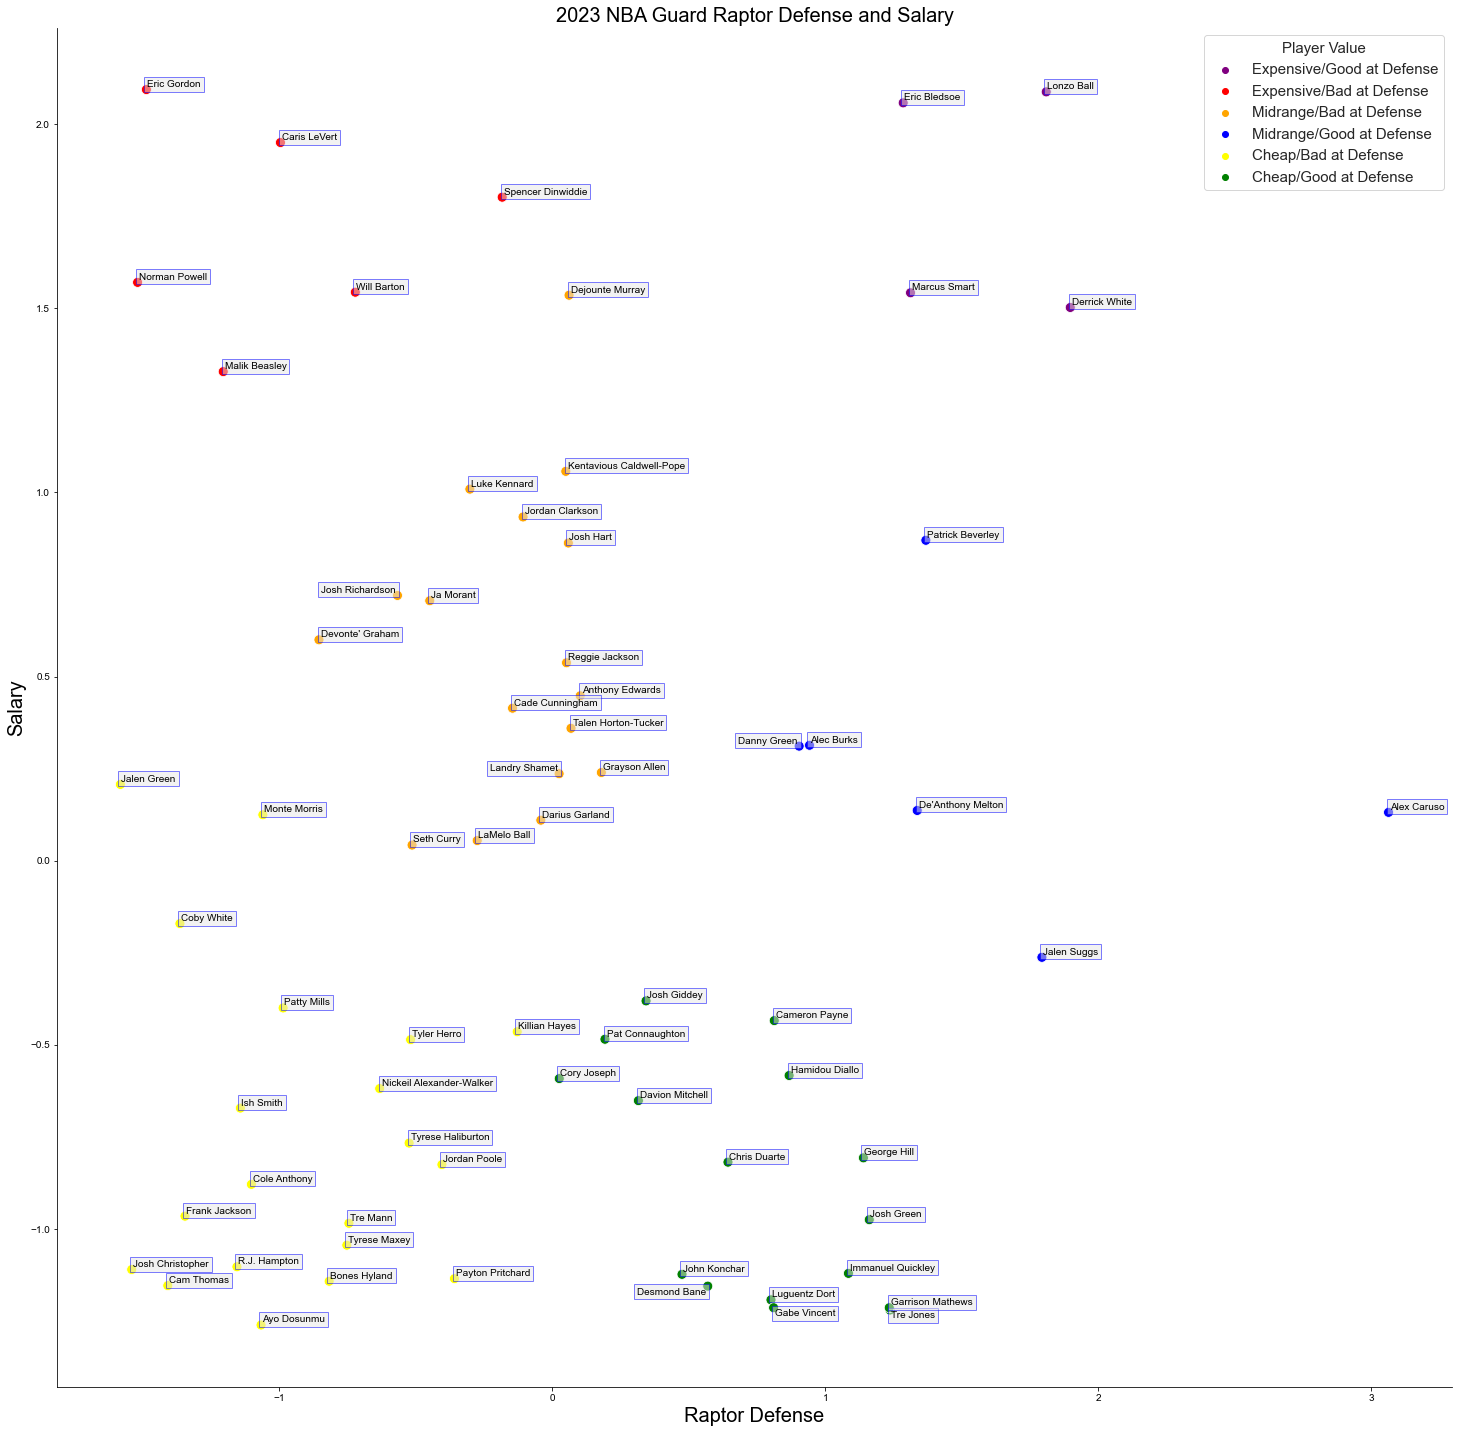

In [60]:
# Now we can plot the data with the cluster assigned
plt.rcParams["figure.figsize"] = (25, 25)
fig, ax = plt.subplots()
# plot
ax.scatter(x=final_dataset_std["Raptor Defense"], y=final_dataset_std["Salary"])
# set labels
ax.set_xlabel("Raptor Defense",size=20)
ax.set_ylabel("Salary",size=20)
ax.set_title("2023 NBA Guard Raptor Defense and Salary",size=20)
#Prevent overlapping and put box around player names for aesthetics
texts = []
for i in range(len(final_dataset_std)):
    texts.append(ax.text(final_dataset_std['Raptor Defense'][i], final_dataset_std['Salary'][i], final_dataset_std['Player'][i],bbox={
            "facecolor": ".9",
            "edgecolor": "blue",
            "boxstyle": "square",
            "alpha": 0.5,
        },
    ))
    
adjust_text(texts)


# Make function to create new column with cluster representatives
def clusters(cluster):
    if cluster == 3:
        return "Midrange/Bad at Defense"
    elif cluster == 2:
        return "Midrange/Good at Defense"
    elif cluster == 0:
        return "Cheap/Bad at Defense"
    elif cluster == 1:
        return "Expensive/Bad at Defense"
    elif cluster == 4:
        return "Cheap/Good at Defense"
    elif cluster == 5:
        return "Expensive/Good at Defense"


# Create new column with cluster representatives
final_dataset_std["Cluster Values"] = final_dataset_std["Cluster"].apply(clusters)
#Plotting the data with Seaborn
sns.set_style("whitegrid")
sns.despine()
sns.scatterplot(
    ax=ax,
    x="Raptor Defense",
    y="Salary",
    data=final_dataset_std,
    s=100,
    hue="Cluster Values",
    palette=["purple", "red", "orange", "blue","yellow","green"],
)
plt.legend(fontsize=15, title="Player Value", title_fontsize=15)
